# Analysis: Programa Mais Médicos

O objetivo desse notebook é, a partir de dados do Programa Mais Médicos, aplicar métodos de Machine Learn para entender quais são as features (variáveis) que melhor explicam o churn, isto é, a decisão de um médico permanecer na cidade em que foi designado após o período de 4,5 anos de início do programa. Para isso, estruturamos o script em três etapas:

**1. Pré-processamento:** A base será tratada de forma que possa ser utilizada para treinar o modelo.

**2. Definição do modelo:** Definição do modelo preditivo com as melhores métricas.

**3. Interpretação:** Explicação do modelo escolhido.

## Pré-processamento

Iniciaremos carregando os pacotes que serão necessários e a base de dados.

In [21]:
import pandas as pd
import numpy as np

In [2]:
df_original = pd.read_excel('databasev2.xlsx')

df_original

,ano,competen,codufmun,ibge_aloc,municipio_destino,uf_destino,cnes,tp_unid,fantasia,nomeprof,...,vagas_medicina_milhab,orcamento_saude,esgotamento_sanitario,taxa_homicidio,ideb_anosiniciais,ideb_anosfinais,investimento_infraestrutura,equipamentos_esportivos,equpamentos_culturais,distancia_capital
0,2019,2019-06-01,240580,240580,JOAO CAMARA,RN,2474689,2,PSF 2 SAO FRANCISCO,MARLIO EVERTON MACEDO DE PAIVA,...,0.000000,617.07,35.43,51.495,4.2,3.0,1076.540,2.878,5.756,81.0
1,2019,2019-06-01,220020,220020,AGUA BRANCA,PI,2368455,2,POSTO DE SAUDE OTACIANA MARIA DO NASCIMENTO,ANA MARIA REGO COSTA,...,0.000000,997.20,35.77,11.487,6.0,4.9,3447.022,46.112,34.584,101.0
2,2019,2019-10-01,520310,520310,BALIZA,GO,2500132,2,ESF MARLENE NERY RIBEIRO,RUBENS NOVAIS XAVIER,...,0.000000,785.85,0.00,38.926,6.2,4.9,2781.115,20.032,20.032,420.0
3,2019,2019-09-01,290195,290195,APUAREMA,BA,7050062,2,USF OTACIANO,HERALDO ROCHA DE JESUS,...,0.000000,578.33,0.00,40.928,4.2,3.4,4027.146,13.587,27.174,343.0
4,2019,2019-09-01,130340,130340,PARINTINS,AM,9640347,2,UNIDADE BASICA DE SAUDE DO BAIRRO DA UNIAO,KEDMA TAVARES BUAS,...,0.000000,469.07,0.00,21.002,5.0,4.4,3341.453,1.767,1.767,369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,2019,2019-06-01,210300,210300,CAXIAS,MA,2453789,2,UBS BAU,MARIA INES CAMELO DE ALENCAR,...,2.898588,635.95,5.50,29.719,4.8,3.9,3171.752,6.089,3.045,365.0
1643,2019,2019-09-01,130290,130290,MAUES,AM,2019493,2,CENTRO DE SAUDE ARACY MAFRA MONTEIRO,MARIA HERMELINA MACIEL MACEDO,...,0.000000,606.24,11.32,32.861,5.0,4.0,2207.146,7.967,6.374,270.0
1644,2019,2019-10-01,150020,150020,ACARA,PA,7947429,1,ESTRATEGIA DE SAUDE DA FAMILIA PANTANAL,TATIANA NAZARE NUNES LEDESMA,...,0.000000,344.78,0.00,43.172,3.8,3.3,223.513,3.603,1.801,117.0
1645,2019,2019-10-01,293330,293330,VITORIA DA CONQUISTA,BA,2402068,2,USF DE BATE PE,RONILSON RIBEIRO CHAVES,...,5.516624,752.09,82.96,51.406,5.6,4.6,3083.584,1.180,2.951,518.0


Abaixo selecionaremos apenas as variáveis de interesse.

In [3]:
df_tratada01 = df_original.loc[:,('uf_destino',
                        'sexo',
                         'atuacao_previa_no_municipio',
                         'anos_atuacao_mesmo_municipio', 
                         'media_vinculos', 
                         'idade_em_anos',
                         'anos_formacao',
                         'leitos_instalacao_fisica_urgencia',
                        'agente_saude', 
                        'dentista',
                        'enfermeiro', 
                        'tec_aux_enf', 
                        'porte', 
                        'pib_percapita',
                        'tx_pop_ocupada', 
                        'cobertura_saude', 
                        'vagas_medicina_milhab',
                        'orcamento_saude', 
                        'esgotamento_sanitario', 
                        'taxa_homicidio',
                        'ideb_anosiniciais',
                        'ideb_anosfinais',
                        'investimento_infraestrutura',
                        'equipamentos_esportivos', 
                        'equpamentos_culturais',
                        'churn',
                        'distancia_capital')]

df_tratada01

,uf_destino,sexo,atuacao_previa_no_municipio,anos_atuacao_mesmo_municipio,media_vinculos,idade_em_anos,anos_formacao,leitos_instalacao_fisica_urgencia,agente_saude,dentista,...,orcamento_saude,esgotamento_sanitario,taxa_homicidio,ideb_anosiniciais,ideb_anosfinais,investimento_infraestrutura,equipamentos_esportivos,equpamentos_culturais,churn,distancia_capital
0,RN,Masculino,Não,0.0,1.000000,54.094456,0.084873,7.0,5.166667,1.000000,...,617.07,35.43,51.495,4.2,3.0,1076.540,2.878,5.756,Migrou,81.0
1,PI,Feminino,Não,0.0,1.000000,44.654346,0.084873,4.0,6.166667,1.000000,...,997.20,35.77,11.487,6.0,4.9,3447.022,46.112,34.584,Permaneceu,101.0
2,GO,Masculino,Não,0.0,1.301587,48.147844,1.333333,8.0,10.333333,0.833333,...,785.85,0.00,38.926,6.2,4.9,2781.115,20.032,20.032,Migrou,420.0
3,BA,Masculino,Não,0.0,1.000000,48.533881,0.917180,5.0,8.333333,1.000000,...,578.33,0.00,40.928,4.2,3.4,4027.146,13.587,27.174,Migrou,343.0
4,AM,Feminino,Não,0.0,1.234375,44.060233,0.999316,10.0,15.166667,2.000000,...,469.07,0.00,21.002,5.0,4.4,3341.453,1.767,1.767,Migrou,369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,MA,Feminino,Não,0.0,1.000000,58.258727,23.838467,5.0,10.833333,1.000000,...,635.95,5.50,29.719,4.8,3.9,3171.752,6.089,3.045,Permaneceu,365.0
1643,AM,Feminino,Não,0.0,1.129032,45.626283,1.251198,8.0,25.333333,2.000000,...,606.24,11.32,32.861,5.0,4.0,2207.146,7.967,6.374,Migrou,270.0
1644,PA,Feminino,Não,0.0,1.000000,42.967830,0.999316,2.0,11.000000,1.000000,...,344.78,0.00,43.172,3.8,3.3,223.513,3.603,1.801,Migrou,117.0
1645,BA,Masculino,Não,0.0,1.000000,48.999316,1.500342,3.0,10.333333,1.000000,...,752.09,82.96,51.406,5.6,4.6,3083.584,1.180,2.951,Migrou,518.0


**A seguir, codificaremos as variáveis categórias da base de dados, utilizando três pacotes do sckit-learn:**

**OneHotEncoder**: indicado para variáveis com mais de duas categorias, e dessa forma, binarizando as variaveis em diversas colunas.

**OrdinalEncoder**: indicado para variáveis categóricas ordinais. Exemplo: Baixo, médio, alto.

**LabelEncoder**: indicado para variáveis categóricas binárias, isto é, com apenas dois valores.

In [4]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

enc = OneHotEncoder(sparse_output=False)

one_hot = enc.fit_transform(df_tratada01[['uf_destino']]) #Aplicando a função

df_one_hot = pd.DataFrame(one_hot, columns=enc.get_feature_names_out(['uf_destino'])) #Transformando em data frame

df_tratada02 = pd.concat([df_tratada01, df_one_hot], axis = 1) #Juntando a base

df_tratada02 = df_tratada02.drop('uf_destino', axis = 1) #Excluindo a variável original qualitativa

df_tratada02

,sexo,atuacao_previa_no_municipio,anos_atuacao_mesmo_municipio,media_vinculos,idade_em_anos,anos_formacao,leitos_instalacao_fisica_urgencia,agente_saude,dentista,enfermeiro,...,uf_destino_PR,uf_destino_RJ,uf_destino_RN,uf_destino_RO,uf_destino_RR,uf_destino_RS,uf_destino_SC,uf_destino_SE,uf_destino_SP,uf_destino_TO
0,Masculino,Não,0.0,1.000000,54.094456,0.084873,7.0,5.166667,1.000000,1.166667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Feminino,Não,0.0,1.000000,44.654346,0.084873,4.0,6.166667,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Masculino,Não,0.0,1.301587,48.147844,1.333333,8.0,10.333333,0.833333,2.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Masculino,Não,0.0,1.000000,48.533881,0.917180,5.0,8.333333,1.000000,1.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Feminino,Não,0.0,1.234375,44.060233,0.999316,10.0,15.166667,2.000000,3.650000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Feminino,Não,0.0,1.000000,58.258727,23.838467,5.0,10.833333,1.000000,1.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,Feminino,Não,0.0,1.129032,45.626283,1.251198,8.0,25.333333,2.000000,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644,Feminino,Não,0.0,1.000000,42.967830,0.999316,2.0,11.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1645,Masculino,Não,0.0,1.000000,48.999316,1.500342,3.0,10.333333,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['PP-I', 'PP-II', 'MP', 'GP', 'Metropole']]) #Definindo a ordem

ord_enc_transf = ord_enc.fit_transform(df_tratada02[['porte']]) #Aplicando a função

df_ord_enc = pd.DataFrame(ord_enc_transf, columns = ['porte_encod'], index=df_tratada02.index) # Transformando em Data frame

df_tratada03 = pd.concat([df_tratada02, df_ord_enc], axis = 1) #Juntando a base

df_tratada03 = df_tratada03.drop('porte', axis = 1) #Excluindo a variável qualitativa

df_tratada03

,sexo,atuacao_previa_no_municipio,anos_atuacao_mesmo_municipio,media_vinculos,idade_em_anos,anos_formacao,leitos_instalacao_fisica_urgencia,agente_saude,dentista,enfermeiro,...,uf_destino_RJ,uf_destino_RN,uf_destino_RO,uf_destino_RR,uf_destino_RS,uf_destino_SC,uf_destino_SE,uf_destino_SP,uf_destino_TO,porte_encod
0,Masculino,Não,0.0,1.000000,54.094456,0.084873,7.0,5.166667,1.000000,1.166667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Feminino,Não,0.0,1.000000,44.654346,0.084873,4.0,6.166667,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Masculino,Não,0.0,1.301587,48.147844,1.333333,8.0,10.333333,0.833333,2.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Masculino,Não,0.0,1.000000,48.533881,0.917180,5.0,8.333333,1.000000,1.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Feminino,Não,0.0,1.234375,44.060233,0.999316,10.0,15.166667,2.000000,3.650000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Feminino,Não,0.0,1.000000,58.258727,23.838467,5.0,10.833333,1.000000,1.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1643,Feminino,Não,0.0,1.129032,45.626283,1.251198,8.0,25.333333,2.000000,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1644,Feminino,Não,0.0,1.000000,42.967830,0.999316,2.0,11.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1645,Masculino,Não,0.0,1.000000,48.999316,1.500342,3.0,10.333333,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [6]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

label_enc.fit(df_tratada03['sexo'])

mapping = dict(zip(label_enc.classes_, range(len(label_enc.classes_)))) #Mapeando a codificação

print('Mapeamento das categorias:', mapping)

label_enc_transf = label_enc.fit_transform(df_tratada03['sexo']) #Aplicando a função

df_label_enc = pd.DataFrame(label_enc_transf, columns =['sexo_encod'], index = df_tratada03.index) #Transformando em data frame

df_tratada04 = pd.concat([df_tratada03, df_label_enc], axis = 1) #Juntando a base

df_tratada04 = df_tratada04.drop('sexo', axis = 1) #Excluindo a variável qualitativa

df_tratada04

Mapeamento das categorias: {'Feminino': 0, 'Masculino': 1}


,atuacao_previa_no_municipio,anos_atuacao_mesmo_municipio,media_vinculos,idade_em_anos,anos_formacao,leitos_instalacao_fisica_urgencia,agente_saude,dentista,enfermeiro,tec_aux_enf,...,uf_destino_RN,uf_destino_RO,uf_destino_RR,uf_destino_RS,uf_destino_SC,uf_destino_SE,uf_destino_SP,uf_destino_TO,porte_encod,sexo_encod
0,Não,0.0,1.000000,54.094456,0.084873,7.0,5.166667,1.000000,1.166667,1.833333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,Não,0.0,1.000000,44.654346,0.084873,4.0,6.166667,1.000000,1.000000,2.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Não,0.0,1.301587,48.147844,1.333333,8.0,10.333333,0.833333,2.566667,7.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,Não,0.0,1.000000,48.533881,0.917180,5.0,8.333333,1.000000,1.166667,2.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Não,0.0,1.234375,44.060233,0.999316,10.0,15.166667,2.000000,3.650000,9.025000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Não,0.0,1.000000,58.258727,23.838467,5.0,10.833333,1.000000,1.333333,2.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
1643,Não,0.0,1.129032,45.626283,1.251198,8.0,25.333333,2.000000,3.166667,4.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1644,Não,0.0,1.000000,42.967830,0.999316,2.0,11.000000,1.000000,1.000000,1.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1645,Não,0.0,1.000000,48.999316,1.500342,3.0,10.333333,1.000000,1.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1


In [134]:
label_enc.fit(df_tratada04['atuacao_previa_no_municipio'])

mapping = dict(zip(label_enc.classes_, range(len(label_enc.classes_)))) #Mapeando a codificação

print('Mapeamento das categorias:', mapping)

label_enc_transf = label_enc.fit_transform(df_tratada04['atuacao_previa_no_municipio']) #Aplicando a função
 
df_label_enc = pd.DataFrame(label_enc_transf, columns = ['atuacao_previa_encod'], index = df_tratada04.index) #Transformando em data frame

df_tratada05 = pd.concat([df_tratada04, df_label_enc], axis = 1) #Juntando a base

df_tratada05 = df_tratada05.drop('atuacao_previa_no_municipio', axis=1) #Excluindo a variável qualitativa

df_tratada05

Mapeamento das categorias: {'Não': 0, 'Sim': 1}


,anos_atuacao_mesmo_municipio,media_vinculos,idade_em_anos,anos_formacao,leitos_instalacao_fisica_urgencia,agente_saude,dentista,enfermeiro,tec_aux_enf,pib_percapita,...,uf_destino_RO,uf_destino_RR,uf_destino_RS,uf_destino_SC,uf_destino_SE,uf_destino_SP,uf_destino_TO,porte_encod,sexo_encod,atuacao_previa_encod
0,0.0,1.000000,54.094456,0.084873,7.0,5.166667,1.000000,1.166667,1.833333,26617.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
1,0.0,1.000000,44.654346,0.084873,4.0,6.166667,1.000000,1.000000,2.833333,12427.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,1.301587,48.147844,1.333333,8.0,10.333333,0.833333,2.566667,7.166667,15966.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,1.000000,48.533881,0.917180,5.0,8.333333,1.000000,1.166667,2.300000,8867.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,1.234375,44.060233,0.999316,10.0,15.166667,2.000000,3.650000,9.025000,10723.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,0.0,1.000000,58.258727,23.838467,5.0,10.833333,1.000000,1.333333,2.833333,10983.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0
1643,0.0,1.129032,45.626283,1.251198,8.0,25.333333,2.000000,3.166667,4.166667,8624.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
1644,0.0,1.000000,42.967830,0.999316,2.0,11.000000,1.000000,1.000000,1.500000,13582.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0
1645,0.0,1.000000,48.999316,1.500342,3.0,10.333333,1.000000,1.000000,3.000000,21459.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,0


In [8]:
label_enc.fit(df_tratada05['churn'])

mapping = dict(zip(label_enc.classes_, range(len(label_enc.classes_)))) #Mapeando a codificação

print('Mapeamento das categorias:', mapping)

label_enc_transf = label_enc.fit_transform(df_tratada05['churn']) #Aplicando a função

df_label_enc = pd.DataFrame(label_enc_transf, columns = ['churn_encod'], index = df_tratada05.index) #Transformando em data frame

df_tratada06 = pd.concat([df_tratada05, df_label_enc], axis = 1) #Juntando a base

df_tratada06 = df_tratada06.drop('churn', axis = 1) #Excluindo a variável qualitativa

df_tratada06

Mapeamento das categorias: {'Migrou': 0, 'Permaneceu': 1}


,anos_atuacao_mesmo_municipio,media_vinculos,idade_em_anos,anos_formacao,leitos_instalacao_fisica_urgencia,agente_saude,dentista,enfermeiro,tec_aux_enf,pib_percapita,...,uf_destino_RR,uf_destino_RS,uf_destino_SC,uf_destino_SE,uf_destino_SP,uf_destino_TO,porte_encod,sexo_encod,atuacao_previa_encod,churn_encod
0,0.0,1.000000,54.094456,0.084873,7.0,5.166667,1.000000,1.166667,1.833333,26617.73,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,0.0,1.000000,44.654346,0.084873,4.0,6.166667,1.000000,1.000000,2.833333,12427.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,0.0,1.301587,48.147844,1.333333,8.0,10.333333,0.833333,2.566667,7.166667,15966.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,0.0,1.000000,48.533881,0.917180,5.0,8.333333,1.000000,1.166667,2.300000,8867.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,0.0,1.234375,44.060233,0.999316,10.0,15.166667,2.000000,3.650000,9.025000,10723.83,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,0.0,1.000000,58.258727,23.838467,5.0,10.833333,1.000000,1.333333,2.833333,10983.60,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,1
1643,0.0,1.129032,45.626283,1.251198,8.0,25.333333,2.000000,3.166667,4.166667,8624.92,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
1644,0.0,1.000000,42.967830,0.999316,2.0,11.000000,1.000000,1.000000,1.500000,13582.97,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
1645,0.0,1.000000,48.999316,1.500342,3.0,10.333333,1.000000,1.000000,3.000000,21459.83,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0


Abaixo é realizado o tratatamento dos valores ausentes. O método adotado é de substituir os missing pela média, para isso é utilizada função do pacote sckit-learn.

In [9]:
df_tratada06.isna().sum() #Verificando presença de valores ausentes

anos_atuacao_mesmo_municipio           0
media_vinculos                         0
idade_em_anos                          0
anos_formacao                          0
leitos_instalacao_fisica_urgencia     11
agente_saude                           2
dentista                               2
enfermeiro                             2
tec_aux_enf                            2
pib_percapita                          0
tx_pop_ocupada                         0
cobertura_saude                        0
vagas_medicina_milhab                  0
orcamento_saude                        0
esgotamento_sanitario                  0
taxa_homicidio                         0
ideb_anosiniciais                     26
ideb_anosfinais                      304
investimento_infraestrutura            0
equipamentos_esportivos                0
equpamentos_culturais                  0
distancia_capital                      0
uf_destino_AC                          0
uf_destino_AL                          0
uf_destino_AM   

In [10]:
from sklearn.impute import SimpleImputer

columns = ['anos_atuacao_mesmo_municipio',
             'media_vinculos', 
             'idade_em_anos',
             'anos_formacao',
             'leitos_instalacao_fisica_urgencia',
            'agente_saude', 
            'dentista',
            'enfermeiro', 
            'tec_aux_enf',
            'pib_percapita',
            'tx_pop_ocupada', 
            'cobertura_saude', 
            'vagas_medicina_milhab',
            'orcamento_saude', 
            'esgotamento_sanitario', 
            'taxa_homicidio',
            'ideb_anosiniciais',
            'ideb_anosfinais',
            'investimento_infraestrutura',
            'equipamentos_esportivos', 
            'equpamentos_culturais',
            'distancia_capital']

imputer = SimpleImputer(strategy = 'mean') #Definindo objeto com método de imputação

df_tratada07 = df_tratada06.copy()

df_tratada07[columns] = imputer.fit_transform(df_tratada06[columns]) #Aplicando método

df_tratada07.isna().sum() #Verificando presença de valores ausentes

anos_atuacao_mesmo_municipio         0
media_vinculos                       0
idade_em_anos                        0
anos_formacao                        0
leitos_instalacao_fisica_urgencia    0
agente_saude                         0
dentista                             0
enfermeiro                           0
tec_aux_enf                          0
pib_percapita                        0
tx_pop_ocupada                       0
cobertura_saude                      0
vagas_medicina_milhab                0
orcamento_saude                      0
esgotamento_sanitario                0
taxa_homicidio                       0
ideb_anosiniciais                    0
ideb_anosfinais                      0
investimento_infraestrutura          0
equipamentos_esportivos              0
equpamentos_culturais                0
distancia_capital                    0
uf_destino_AC                        0
uf_destino_AL                        0
uf_destino_AM                        0
uf_destino_AP            

**A seguir, aplicaremos normalização nas variaveis quantitativas.**

A normalização é importante tendo em vista que os modelos em machine learn são sensíveis a features com escalas distintas, o que pode viesar os resultados. Para isso, aplica-se a transformação com método de Min-Max que enquadra as variáveis na escala que varia de 0 a 1.

In [11]:
from sklearn.preprocessing import MinMaxScaler

norm_columns = ['anos_atuacao_mesmo_municipio', 
             'media_vinculos', 
             'idade_em_anos',
             'anos_formacao',
             'leitos_instalacao_fisica_urgencia',
            'agente_saude', 
            'dentista',
            'enfermeiro', 
            'tec_aux_enf',
            'pib_percapita',
            'tx_pop_ocupada', 
            'cobertura_saude', 
            'vagas_medicina_milhab',
            'orcamento_saude', 
            'esgotamento_sanitario', 
            'taxa_homicidio',
            'ideb_anosiniciais',
            'ideb_anosfinais',
            'investimento_infraestrutura',
            'equipamentos_esportivos', 
            'equpamentos_culturais',
            'distancia_capital']

df_tratada08 = df_tratada07.copy()

scaler = MinMaxScaler()

df_tratada08[norm_columns] = scaler.fit_transform(df_tratada07[norm_columns])

df_tratada08

,anos_atuacao_mesmo_municipio,media_vinculos,idade_em_anos,anos_formacao,leitos_instalacao_fisica_urgencia,agente_saude,dentista,enfermeiro,tec_aux_enf,pib_percapita,...,uf_destino_RR,uf_destino_RS,uf_destino_SC,uf_destino_SE,uf_destino_SP,uf_destino_TO,porte_encod,sexo_encod,atuacao_previa_encod,churn_encod
0,0.0,0.000000,0.552136,0.001599,0.205882,0.092262,0.054103,0.005760,0.002661,0.063440,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
1,0.0,0.000000,0.386606,0.001599,0.117647,0.110119,0.054103,0.004937,0.004113,0.022785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,0.0,0.078931,0.447864,0.025117,0.235294,0.184524,0.045086,0.012672,0.010402,0.032925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,0.0,0.000000,0.454633,0.017278,0.147059,0.148810,0.054103,0.005760,0.003338,0.012583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,0.0,0.061340,0.376188,0.018825,0.294118,0.270833,0.108206,0.018021,0.013100,0.017903,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,0.0,0.000000,0.625156,0.449069,0.147059,0.193452,0.054103,0.006583,0.004113,0.018647,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,1
1643,0.0,0.033770,0.403649,0.023570,0.235294,0.452381,0.108206,0.015635,0.006048,0.011889,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
1644,0.0,0.000000,0.357033,0.018825,0.058824,0.196429,0.054103,0.004937,0.002177,0.026095,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
1645,0.0,0.000000,0.462794,0.028263,0.088235,0.184524,0.054103,0.004937,0.004354,0.048662,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0


## Definição do modelo

In [138]:
from pycaret.classification import *

clf1 = setup(data = df_tratada08, 
             target = 'churn_encod',
             train_size=0.7,
             fix_imbalance=True,
             fold=10,
            session_id = 5049)

,Description,Value
0,Session id,5049
1,Target,churn_encod
2,Target type,Binary
3,Original data shape,"(1647, 52)"
4,Transformed data shape,"(1671, 52)"
5,Transformed train set shape,"(1176, 52)"
6,Transformed test set shape,"(495, 52)"
7,Numeric features,51
8,Preprocess,True
9,Imputation type,simple


In [139]:
best_model = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6450,0.6832,0.6839,0.6429,0.6624,0.2888,0.2900,0.0950
lr,Logistic Regression,0.6285,0.6710,0.6839,0.6252,0.6524,0.2551,0.2570,0.6940
ridge,Ridge Classifier,0.6277,0.6695,0.6858,0.6233,0.6513,0.2536,0.2573,0.0130
rf,Random Forest Classifier,0.6233,0.6680,0.6225,0.6348,0.6275,0.2463,0.2473,0.0720
lda,Linear Discriminant Analysis,0.6233,0.6648,0.6789,0.6205,0.6464,0.2449,0.2483,0.0150
lightgbm,Light Gradient Boosting Machine,0.6129,0.6610,0.6312,0.6173,0.6224,0.2251,0.2262,0.1070
ada,Ada Boost Classifier,0.6094,0.6506,0.6413,0.6129,0.6261,0.2176,0.2184,0.0420
svm,SVM - Linear Kernel,0.6024,0.6544,0.7183,0.6023,0.6258,0.2018,0.2269,0.0150
et,Extra Trees Classifier,0.6024,0.6371,0.5988,0.6148,0.6056,0.2049,0.2057,0.0580
dt,Decision Tree Classifier,0.5790,0.5788,0.5867,0.5878,0.5850,0.1577,0.1591,0.0160


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [140]:
tuned_model_gbc = tune_model(best_model[0])
tuned_model_gbc

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6034,0.6295,0.6102,0.6102,0.6102,0.2067,0.2067
1,0.6638,0.7009,0.6441,0.6786,0.6609,0.3280,0.3284
2,0.6609,0.7031,0.7458,0.6471,0.6929,0.3185,0.3225
3,0.6000,0.6610,0.6780,0.5970,0.6349,0.1965,0.1985
4,0.6000,0.6323,0.6441,0.6032,0.6230,0.1980,0.1985
5,0.7304,0.7258,0.7966,0.7121,0.7520,0.4588,0.4622
6,0.6000,0.6789,0.6102,0.6102,0.6102,0.1995,0.1995
7,0.7478,0.7400,0.7627,0.7500,0.7563,0.4951,0.4952
8,0.6522,0.7181,0.7069,0.6406,0.6721,0.3037,0.3053


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=8,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_samples_leaf=4,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=230, n_iter_no_change=None,
                           random_state=5049, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [141]:
avaliacao = predict_model(tuned_model_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6646,0.7121,0.6680,0.6733,0.6706,0.3291,0.3291


Primeiro, segregaremos as variáveis em dois dataframe, um com a variável de desfecho (target) e as features (preditoras).

In [12]:

target = df_tratada08['churn_encod']

preditoras = df_tratada08.drop('churn_encod', axis = 1)


In [13]:
from imblearn.over_sampling import SMOTE

balanceador = SMOTE()

preditoras_bal, target_bal = balanceador.fit_resample(preditoras, target)


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(preditoras_bal, target_bal, test_size = 0.3,
                                                    random_state = 5050)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


#Definindo o modelo
rf_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                                criterion='entropy', max_depth=3, max_features=1.0,
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.02, min_samples_leaf=4,
                                min_samples_split=2, min_weight_fraction_leaf=0.0,
                                monotonic_cst=None, n_estimators=120, n_jobs=-1,
                                oob_score=False, random_state=5049, verbose=0,
                                warm_start=False)

#Treinando o modelo
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(x_test)

print(classification_report(y_test, y_pred))

rf_clf.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       242
           1       0.68      0.59      0.63       263

    accuracy                           0.64       505
   macro avg       0.64      0.64      0.64       505
weighted avg       0.65      0.64      0.64       505



RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=1.0,
                       min_impurity_decrease=0.02, min_samples_leaf=4,
                       n_estimators=120, n_jobs=-1, random_state=5049)

In [16]:
import shap

shap.initjs()

In [28]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(x_train)

In [125]:
shap.force_plot(explainer.expected_value[1], shap_values[2][:, 0], x_train.iloc[2,:])


In [129]:
shap.force_plot(explainer.expected_value[1], shap_values[:, :, 1], x_train)

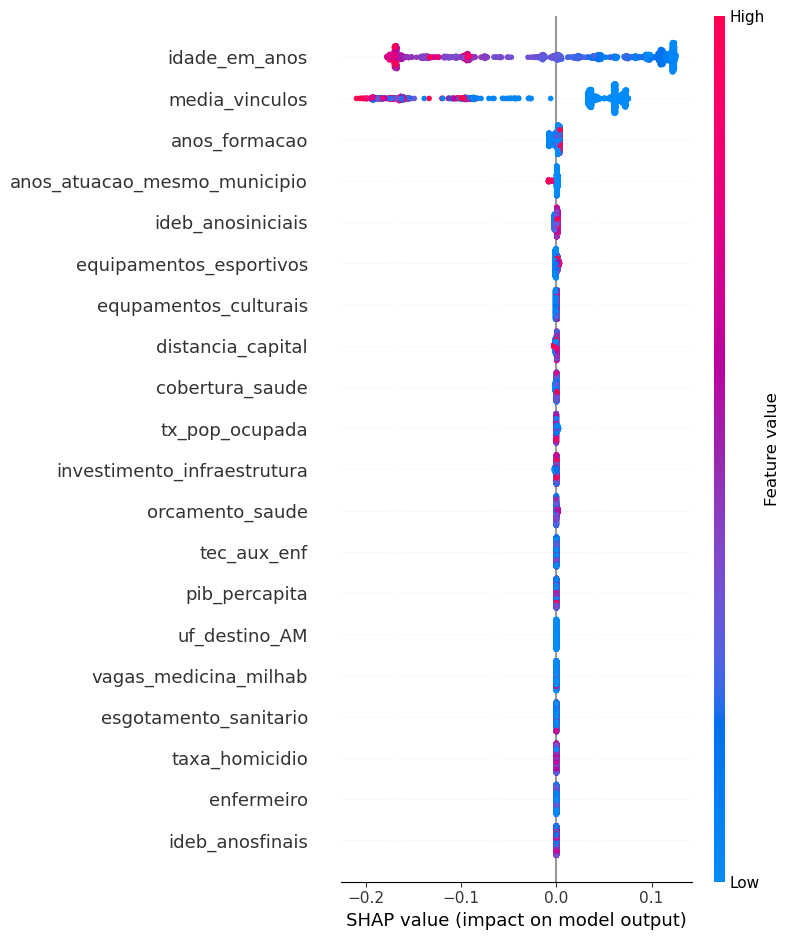

In [128]:
shap.summary_plot(shap_values[:, :, 1], x_train)

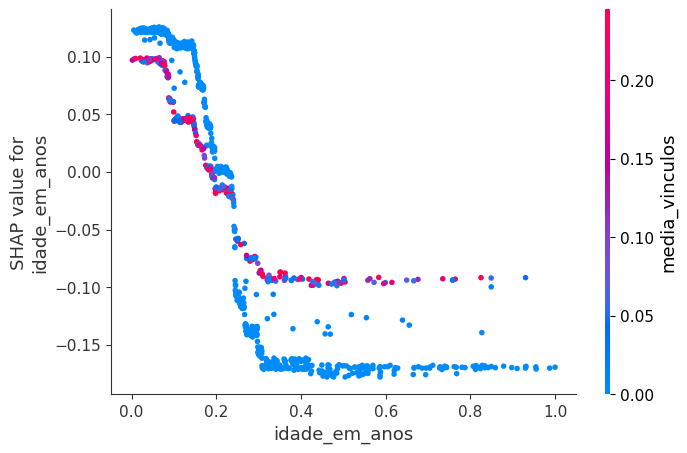

In [133]:
shap.dependence_plot('idade_em_anos', shap_values[:,:,1], x_train, interaction_index="media_vinculos")